In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

coordinates = []
distances = []
x_cord = []
y_cord = []

def get_coordinates(event, x, y, flags, param): #event coordinate get method
    if event == cv2.EVENT_LBUTTONDOWN:
        coordinates.append((x, y))
        x_cord.append(x)
        y_cord.append(y)
        print(f"Point {len(coordinates)} - Coordinates: ({x}, {y})")

        if len(coordinates) >= 2:
            point1 = coordinates[-2]
            point2 = coordinates[-1]
            distance = np.linalg.norm(np.array(point1) - np.array(point2)) #to find distance
            distances.append(distance)
            print(f"Distance from point {len(coordinates)-1} to point {len(coordinates)}: {distance}")

def display_points(image_path, coords):
    image = cv2.imread(image_path)

    for i, (x, y) in enumerate(coords):
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        cv2.putText(image, str(i+1), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def find_coordinates(image_path):
    global coordinates, distances
    coordinates = []
    distances = []
    x_cord = []
    y_cord = []


    image = cv2.imread(image_path)
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", get_coordinates)

    while True:
        cv2.imshow("Image", image)
        key = cv2.waitKey(1) & 0xFF

        if key == ord("q"):
            break

    cv2.destroyAllWindows()

    print("\nCoordinates:")
    for i, (x, y) in enumerate(coordinates):
        print(f"Point {i+1}: ({x}, {y})")

    print("\nDistances:")
    for i, distance in enumerate(distances):
        print(f"Distance from point {i+1} to point {i+2}: {distance}")

    display_points(image_path, coordinates)

# Example usage
image_path = "123.jpg"
find_coordinates(image_path)


Point 1 - Coordinates: (310, 486)
Point 2 - Coordinates: (226, 389)
Distance from point 1 to point 2: 128.3160161476345
Point 3 - Coordinates: (166, 376)
Distance from point 2 to point 3: 61.39218191268331
Point 4 - Coordinates: (380, 395)
Distance from point 3 to point 4: 214.84180226389836
Point 5 - Coordinates: (278, 595)
Distance from point 4 to point 5: 224.50835173774718
Point 6 - Coordinates: (533, 623)
Distance from point 5 to point 6: 256.5326489942362
Point 7 - Coordinates: (539, 511)
Distance from point 6 to point 7: 112.16059914247963
Point 8 - Coordinates: (655, 492)
Distance from point 7 to point 8: 117.5457357797381

Coordinates:
Point 1: (310, 486)
Point 2: (226, 389)
Point 3: (166, 376)
Point 4: (380, 395)
Point 5: (278, 595)
Point 6: (533, 623)
Point 7: (539, 511)
Point 8: (655, 492)

Distances:
Distance from point 1 to point 2: 128.3160161476345
Distance from point 2 to point 3: 61.39218191268331
Distance from point 3 to point 4: 214.84180226389836
Distance from poin

In [90]:
x_cord

[310, 226, 166, 380, 278, 533, 539, 655]

In [91]:
y_cord

[486, 389, 376, 395, 595, 623, 511, 492]

In [92]:
distances = list(np.around(np.array(distances),2))

In [93]:
distances

[128.32, 61.39, 214.84, 224.51, 256.53, 112.16, 117.55]

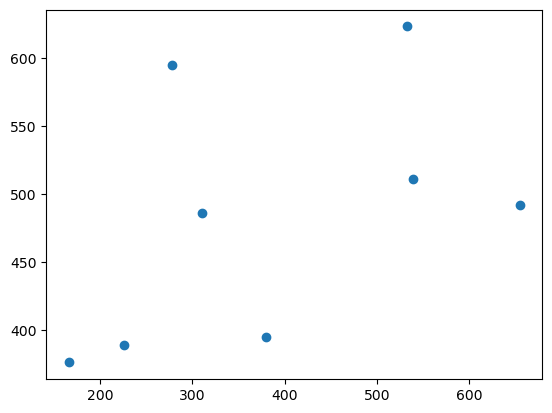

In [94]:
plt.scatter(x_cord, y_cord)

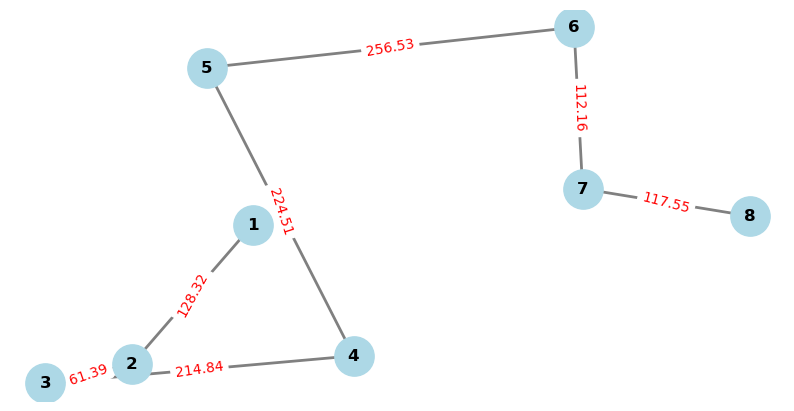

In [95]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with their coordinates
for i, (x, y) in enumerate(coordinates):
    node_label = f"{i+1}"
    G.add_node(node_label, pos=(x, y))

# Add edges with their distances
for i in range(len(distances)):
    node1_label = f"{i+1}"
    node2_label = f"{i+2}"
    distance = distances[i]
    G.add_edge(node1_label, node2_label, distance=distance)

# Get node positions and edge distances
node_positions = nx.get_node_attributes(G, 'pos')
edge_distances = nx.get_edge_attributes(G, 'distance')

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph on the axis with custom styling
nx.draw(G, pos=node_positions, with_labels=True, node_size=800, node_color='lightblue', font_weight='bold',
        edge_color='gray', width=2, ax=ax)
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_distances, font_color='red', ax=ax)
ax.set_aspect('equal')

# Adjust the spacing and limits
ax.margins(0.75)
ax.autoscale(tight=True)

In [96]:
x_cord

[310, 226, 166, 380, 278, 533, 539, 655]

In [97]:
y_cord

[486, 389, 376, 395, 595, 623, 511, 492]

In [98]:
coordinates

[(310, 486),
 (226, 389),
 (166, 376),
 (380, 395),
 (278, 595),
 (533, 623),
 (539, 511),
 (655, 492)]

In [74]:
#np.sort(d)

In [75]:
import math
import heapq

def calculate_distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def dijkstra_shortest_paths(coords):
    num_points = len(coords)
    distances = [math.inf] * num_points
    distances[0] = 0

    pq = [(0, 0)]
    visited = [False] * num_points

    while pq:
        dist, u = heapq.heappop(pq)

        if visited[u]:
            continue

        visited[u] = True

        for v in range(num_points):
            if v != u:
                new_dist = distances[u] + calculate_distance(coords[u], coords[v])
                if new_dist < distances[v]:
                    distances[v] = new_dist
                    heapq.heappush(pq, (new_dist, v))

    return distances


names = ["Point 1", "Point 2", "Point 3", "Point 4", "Point 5","Point 6", "Point 7","Point 8"]

d = []
coordinates = list(zip(x_cord, y_cord))

shortest_distances = dijkstra_shortest_paths(coordinates)

ranked_points = [(dist, name) for dist, name in zip(shortest_distances, names)]
ranked_points.sort()

for rank, (distance, point_name) in enumerate(ranked_points):
    print(f"Rank {rank+1}: {point_name} - Distance: {distance}")
    d.append(distance)


Rank 1: Point 1 - Distance: 0
Rank 2: Point 2 - Distance: 55.362442142665635
Rank 3: Point 3 - Distance: 75.96051605933177
Rank 4: Point 4 - Distance: 143.80890097626084
Rank 5: Point 5 - Distance: 203.55343278854326
Rank 6: Point 6 - Distance: 314.81423093627774
Rank 7: Point 7 - Distance: 398.72296146572745
Rank 8: Point 8 - Distance: 429.6347285776605


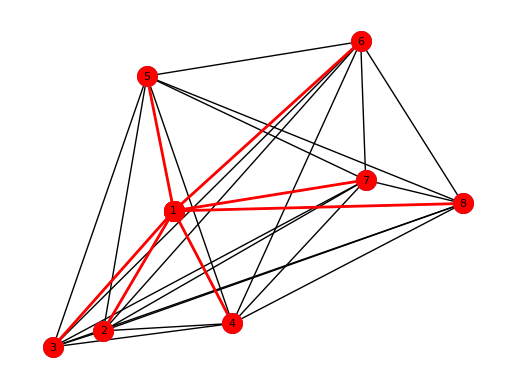

In [101]:
import math
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def calculate_distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def dijkstra_shortest_paths(coords):
    num_points = len(coords)
    distances = [math.inf] * num_points
    distances[0] = 0

    pq = [(0, 0)]
    visited = [False] * num_points

    while pq:
        dist, u = heapq.heappop(pq)

        if visited[u]:
            continue

        visited[u] = True

        for v in range(num_points):
            if v != u:
                new_dist = distances[u] + calculate_distance(coords[u], coords[v])
                if new_dist < distances[v]:
                    distances[v] = new_dist
                    heapq.heappush(pq, (new_dist, v))

    return distances


names = ["1", "2", "3", "4", "5","6", "7","8"]

coordinates = list(zip(x_cord, y_cord))

shortest_distances = dijkstra_shortest_paths(coordinates)

G = nx.Graph()

for i, (x, y) in enumerate(coordinates):
    G.add_node(names[i], pos=(x, y))

for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        G.add_edge(names[i], names[j], weight=calculate_distance(coordinates[i], coordinates[j]))

start_node = names[0]
shortest_paths = {}
for i, node_name in enumerate(names):
    if node_name != start_node:
        shortest_path = nx.dijkstra_path(G, start_node, node_name)
        shortest_paths[node_name] = shortest_path

pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos, with_labels=True, node_size=200, font_size=8)

for node_name, shortest_path in shortest_paths.items():
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    path_nodes = set(shortest_path)
    path_graph = G.subgraph(path_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    nx.draw_networkx_nodes(path_graph, pos, node_color='r', node_size=200)

plt.axis('off')
plt.show()
